# Saving Titanic using Decision Tree
Here in this notebook I am trying to solve the Titanic Challenge with Decision Tree Algorithm but with a twist.  
I programmed a whole Decision Tree algorithm from scratch just with Numpy and Python which you can get on [this discussion](https://www.kaggle.com/discussions/getting-started/553228) or over [this repository](https://github.com/vishesh-kumar-singh/Machine-Learning-Algorithms/tree/main/Decision%20Tree). The next part comes checking if it works as good as the one already present in the sckit-learn library. So I decided to go with Titanic Challenge over Kaggle and see how well can I perform over it.

In [1]:
# Importing Neccesary Libraries and our Algorithms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
# Importing Data
df=pd.read_csv('titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Handling Missing Values
There are 2 missing embarked values, 177 missing Age values and 687 missing Cabin names. I will impute the Embarked and Age values from the dataset, but since there are a total of 687 of Cabin names are missing out of 891 values, it's better to completely drop the Cabin calumn.  
I would use mode for filling the embarked values and Iterative Imputer for filling the Age.

In [6]:
# Dropping Cabin
df.drop(columns=['Cabin'],inplace=True)

In [7]:
# Imputing Age Value through Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
itr_imputer=IterativeImputer()
df['Age']=itr_imputer.fit_transform(df[['Age']])

In [8]:
from sklearn.impute import SimpleImputer
mode_imputer=SimpleImputer(strategy='most_frequent')
df['Embarked']=mode_imputer.fit_transform(df[['Embarked']]).flatten()

In [9]:
# Checking if everything went fine
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Analysis
Now I would like to try with Analyse the trends in the data

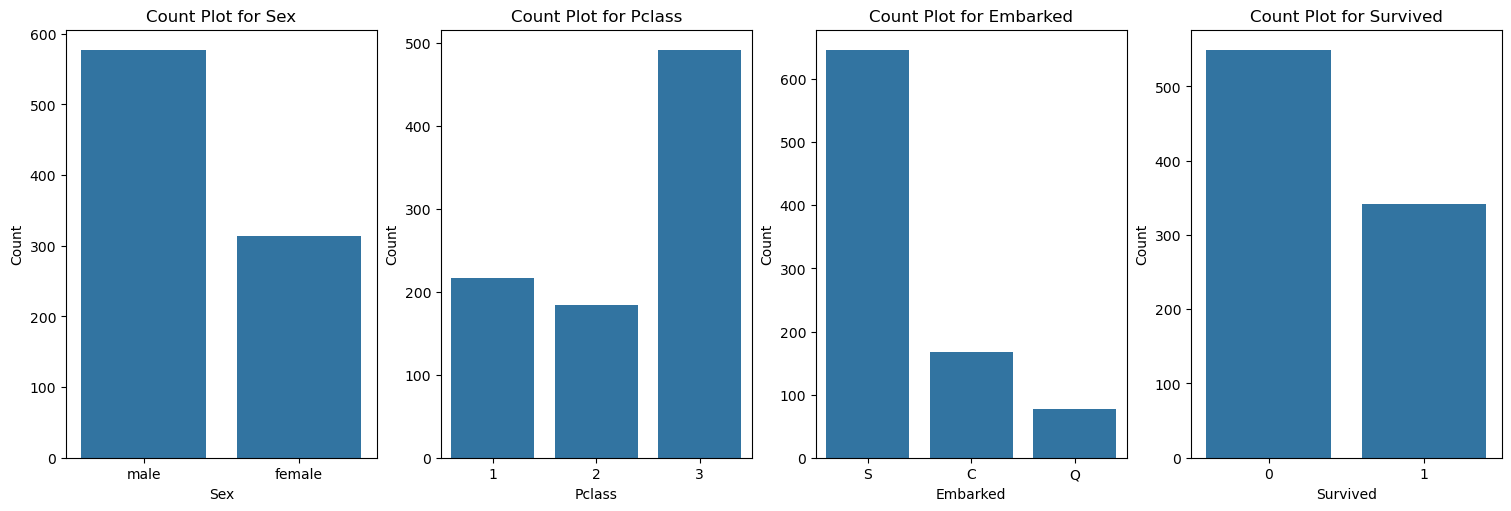

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ["Sex", "Pclass", "Embarked","Survived"]

fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5), constrained_layout=True)


for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Count Plot for {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

plt.show()


By doing this I can see here that the data is imbalanced between Survived and Not-Survived. I have made different outputs some by balancing the data and some without balancing them.

Now, Moving on to the next step.
### Feature Engineering
Now I would like to select feature and encode categorical features.
- Name, Ticket number and Passenger I'd has nothing to do with the survival, so I am gonna drop them.
- Then I will encode the Sex and Embarked.

In [13]:
df.drop(columns=['Name','Ticket','PassengerId'],inplace=True)

In [14]:
# Encoding the values

from sklearn.preprocessing import LabelEncoder
sex_encoder=LabelEncoder()
emb_encoder=LabelEncoder()
df['Sex'] = sex_encoder.fit_transform(df['Sex'])
df['Embarked']=emb_encoder.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Splitting
Now its time to seperate the features and survival as X and y.
I have used two different methods to reduce imbalance, one by oversampling i.e., creating new sets of data simmilar to the class with lesser value and under sampling i.e., reducing the amount of class which is present in larger proportion.
Any one the next two cells can be un-commented and used for the respective tasks
Followed by splitting them into training and testing set(Since I want an aproximate figure of accuracy to adjust the hyperparameters before actually submiting it into the competition.)

In [15]:
X=df.drop(columns=["Survived"]).values
y=df['Survived'].values

In [16]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='auto', random_state=42)

# X, y = smote.fit_resample(X, y)


In [17]:
# from imblearn.under_sampling import RandomUnderSampler

# undersample=RandomUnderSampler(sampling_strategy='auto', random_state=42)

# X,y=undersample.fit_resample(X,y)



In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)
X_test.shape,y_test.shape

((90, 7), (90,))

## Training
Now comes the main part for which all that effort was made. The training part!  
I would first train both the models and then test them over the test split I created.

##### Sckit-learn Algorithm

In [19]:
from sklearn.tree import DecisionTreeClassifier
model_1=DecisionTreeClassifier(criterion='entropy',max_depth=200,min_samples_split=3)
model_1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=200, min_samples_split=3)

In [20]:
y_pred_test=model_1.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred=y_pred_test,y_true=y_test)*100
print(accuracy)

84.44444444444444


##### My Custom Algorithm

In [22]:
from Algorithm import DecisionTree
model_2=DecisionTree(min_samples_split=3,max_depth=200)
model_2.fit(X_train,y_train)

In [23]:
model_2.evaluate(X_test,y_test)

84.44444444444444

## Next comes predicting our given set of testing data and submitting them
I'm gonna continue with the same pre-processing as I did with training data to make them simmilar. Then I'll predict and save the outputs

In [24]:
final_df=pd.read_csv('titanic/test.csv')
final_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
Ids=final_df['PassengerId']
final_df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
final_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [26]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [27]:
final_df['Sex']=sex_encoder.transform(final_df['Sex'])
final_df['Embarked']=emb_encoder.transform(final_df['Embarked'])

In [28]:
X_final=final_df.values
y_pred_1=model_1.predict(X_final)
y_pred_2=model_2.predict(X_final)

The Outputs I saved as MiSj where i is the model I used and j for the jth time I used.
These are all generated by experimenting with balancing data, max depth etc.

In [29]:
output_df_1 = pd.DataFrame({
    'PassengerId': Ids,
    'Survived': y_pred_1
})

output_df_1.to_csv('Submissions/M1S4.csv', index=False)

In [30]:
output_df_2 = pd.DataFrame({
    'PassengerId': Ids,
    'Survived': y_pred_2
})

output_df_2.to_csv('Submissions/M2S4.csv', index=False)

## Results
The following were the accuracy results over Kaggle:

| Submission No.    | Model 1   | Model 2   |
|--------------------|-----------|-----------|
| S1 (Original Data) | 0.71052   | 0.75358   |
| S2 (Oversampling)  | 0.73444   | 0.74162   |
| S3 (Undersampling) | 0.71531   | 0.72099   |
| S4 (Original Data) | 0.73923   | 0.75199   |
| S5 (Original Data) | 0.72966   | 0.74880   |

Although over the test data which I made from the training data both model gave randomly one bwing high and other low or many times being simmilar, but on testing over the entire test data for submission, I don't know why for the same max_depth and min_samples_splits my model is always performing better than in sckit-learn library.  
Maybe I did better job than those who wrote the algorithm over sckit-learn :)